# Machine Learning: Aprendizaje supervisado

**Machine Learning:**

El machine Learning o aprendizaje automático consiste básicamente en automatizar, mediante distintos algoritmos, la identificación de patrones o tendencias que se “esconden” en los datos. Es una rama de la inteligencia artificial que empezó a cobrar importancia a partir de los años 80. Se trata de un tipo de IA que ya no depende de unas reglas y un programador, sino que la computadora puede establecer sus propias reglas y aprender por sí misma.

El objetivo del machine learning es crear un modelo que nos permita resolver una tarea dada. Luego se entrena el modelo usando gran cantidad de datos. El modelo aprende de estos datos y es capaz de hacer predicciones. Es, por lo tanto, un proceso de inducción del conocimiento, es decir, un método que permite obtener por generalización un enunciado general a partir de enunciados que describen casos particulares. Según la tarea que se quiera realizar, será más adecuado trabajar con un algoritmo u otro.

Los tipos de implementación de machine Learning pueden clasificarse en tres categorías diferentes:

- Aprendizaje supervisado
- Aprendizaje no supervisado
- Aprendizaje de refuerzo según la naturaleza de los datos que recibe.

**Aprendizaje supervisado:**

En el aprendizaje supervisado, los algoritmos trabajan con datos etiquetados (labeled data), intentado encontrar una función que, dadas las variables de entrada (input data), les asigne la etiqueta de salida adecuada. El algoritmo se entrena con un histórico de datos y así aprende a asignar la etiqueta de salida adecuada a un nuevo valor, es decir, predice el valor de salida.

El aprendizaje supervisado se suele usar en:

- Problemas de clasificación (identificación de dígitos, diagnósticos, o detección de fraude de identidad)
- Problemas de regresión (predicciones meteorológicas, de expectativa de vida, de crecimiento etc)

Los algoritmos más habituales que aplican para el aprendizaje supervisado son:

- Regresión lineal
- Regresión logística
- K nearest neighbourhoods - KNN
- Árboles de decisión y random forests
- Clasificación de Naïve Bayes
- Support Vector Machines (SVM)
- Métodos Ensemble (Conjuntos de clasificadores)

# 1. Metodología de trabajo en machine learning

## 1.1. Conjuntos de test y entrenamiento

Una práctica habitual dentro del ámbito del aprendizaje automático, es dividir el fichero en dos subconjuntos. El primero de ellos será para el entrenamiento del modelo, cuyo tamaño suele comprender entre el 70-80% del dataset, y el segundo para testear el modelo obtenido a partir de los datos de entrenamiento.

Esta práctica evita los problemas de overfitting que tendría lugar si utilizasemos todo el dataset como conjunto de entrenamiento.

Para dividir un dataset en conjunto de test y en conjunto de entrenamiento, podemos utilizar la función `.train_test_split(inputs, outputs, test_size, random_state)` de la librería `scikit-learn`.

- `inputs`: variables predictoras
- `outputs`: variable dependiente
- `test_size`: % del dataset que se va a utilizar como subconjunto de test
- `random_state`: seed de los número aleatorios

```python
# train_test_split snippet
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
```

## 1.2. Cross validation

La validación cruzada (cross validation) es una técnica utilizada para evaluar que los resultados del análisis estadístico son independientes de las particiones entre subconjuntos de test y entrenamiento.

Esta técnica divide un dataset en subconjunto de test y entrenamiento de k-formas diferentes, y para cada una de estas formas calcula todos los parámetros. Por último se hace la media aritmética de los parámetros de cada validación, y se obtiene una media de los datos. Este método disminuye errores en la estimación de parámetros de cada modelo, y minimiza otras casuísticas como el overfitting.

Dentro del método de validación cruzada, en función del número k en el que dividamos el dataset podemos definir 3 métodos:

- k = 1: validación cruzada simple
- k = 5-10: K-fold cross validation
- k = n: Leave One Out Cross Validation (LOOCV)

En función del valor de $k$, podremos experimentar una compensación del sesgo-varianza, teniendo para valores de $k$ muy elevadas, modelos con un sesgo bajo pero con una varianza muy elevada, es decir overfitting. En bibliografía de referencia como *An Introduction to Statistical Learning*, se recomienda utilizar el método k-fold cross validation.

```Python
# cross validation score snippet
from sklearn.model_selection import cross_val_score
clf_kn = KNeighborsClassifier(n_neighbors=7)
cross_val_score(clf_kn, X, y, cv=5, scoring='accuracy').mean()
```

# 2. Algoritmos de regresión

## 2.1. Regresión lineal

En estadística, la regresión lineal es un modelo matemático usado para aproximar la relación de dependencia entre una variable independiente $x$, y la variable dependiente $y$. Este modelo asume que existe una relación lineal entre la variable $x$ y la varible $y$, más un término denominado error aleatorio que sigue una distribución normal de media cero, $\epsilon$ ~ $N(0,\sigma)$. Matemáticamente se puede expresar como:

\begin{align}
y = f(x) + \epsilon = \alpha + \beta  x + \epsilon
\end{align}

Mediante este método se busca obtener los coeficientes $\alpha$ y $\beta$ para poder realizar predicciones de la variable dependiente.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Carga de datos
url = "https://raw.githubusercontent.com/rezpe/datos_viz/master/house_prices.csv"
df = pd.read_csv(url)

# Variable superficie total
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# Máscara casas menores de 6000 sqft
df = df[df["TotalSF"]<6000]

In [59]:
# Preparación datos
X = df[['TotalSF']]   # pandas DataFrame
y = df['SalePrice']   # pandas Series

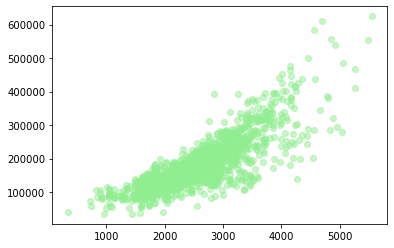

In [60]:
plt.scatter(X, y, c='lightgreen', alpha=0.5);

In [61]:
# Separar el modelo en conjunto de test y entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [62]:
# 1 - Cargar las librerías scikit-learn
from sklearn.linear_model import LinearRegression

# 2 - Crear una instancia
reg_lin = LinearRegression()

# 3 - Entrenar el modelo
reg_lin.fit(X_train, y_train)

# 4 - Predicción
y_pred = reg_lin.predict(X_test)

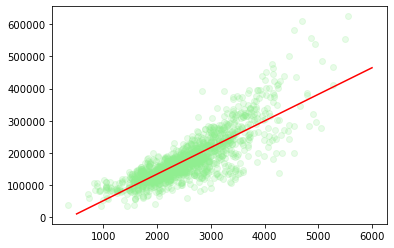

In [63]:
# Graficar el modelo
x_hip = np.linspace(500, 6000)
y_hip = reg_lin.predict(pd.DataFrame(x_hip))

plt.scatter(X, y, c='lightgreen', alpha=0.2)
plt.plot(x_hip, y_hip, c='red');

In [64]:
reg_lin.coef_, reg_lin.intercept_

(array([82.67175649]), -31221.81255650008)

In [65]:
# Load the scorers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Use against predictions
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs(y_test-y_pred)/y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

scores = {'mae': mae, 'mape': mape, 'mse': mse, 'rmse': rmse, 'r2': r2}

for key in scores:
    print(f"{key} score is {scores[key]}")

mae score is 33687.645424627175
mape score is 0.19356658499843452
mse score is 2339540330.971256
rmse score is 48368.795012603485
r2 score is 0.7077187597146779


También se puede evaluar el comportamiento de un modelo mediante validación cruzada, y definiendo una métrica de evaluación.

In [81]:
# Load the library
from sklearn.model_selection import cross_val_score

# We calculate the metric for several subsets (determine by cv, between 5 and 10)
cross_val_score(reg_lin, X, y, cv=5, scoring="neg_mean_absolute_error").mean()

-31053.225860573915

## 2.2. K-Vecinos

Parámetros:

- *n_neighbors*: número $k$ de vecinos

In [101]:
# Separar el modelo en conjunto de test y entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [102]:
# 1 - Cargar las librerías scikit-learn
from sklearn.neighbors import KNeighborsRegressor

# 2 - Crear una instancia
reg_kn = KNeighborsRegressor(n_neighbors=10)    # Hay que definir número de vecinos

# 3 - Entrenar el modelo
reg_kn.fit(X_train, y_train)

# 4 - Predicción
y_pred = reg_kn.predict(X_test)

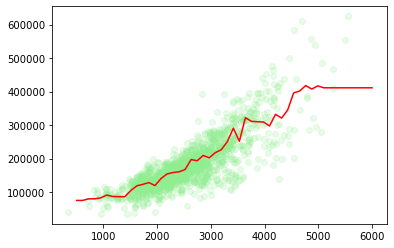

In [103]:
x_hip = np.linspace(500, 6000)
y_hip = reg_kn.predict(pd.DataFrame(x_hip))

plt.scatter(X, y, c='lightgreen', alpha=0.2)
plt.plot(x_hip, y_hip, c='red');

In [104]:
# Load the scorers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Use against predictions
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs(y_test-y_pred)/y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

scores = {'mae': mae, 'mape': mape, 'mse': mse, 'rmse': rmse, 'r2': r2}

for key in scores:
    print(f"{key} score is {scores[key]}")

mae score is 34294.6301369863
mape score is 0.17894646095824682
mse score is 2451999192.0726027
rmse score is 49517.66545458906
r2 score is 0.6936691556242321


Este modelo necesita definir un parámetro cuando se modeliza. Para obtener el valor del parámetro que consigue una mejor bondad de ajuste del modelo, se pueden probar diferentes valores y e ir monitorizando una métrica para visualizar en que punto se obtiene el mejor modelo. 

In [105]:
res = []

for n in np.arange(2, 30):
    reg_kn = KNeighborsRegressor(n_neighbors=n)
    res.append(cross_val_score(reg_kn, X, y, cv=10, scoring="neg_mean_absolute_error").mean())

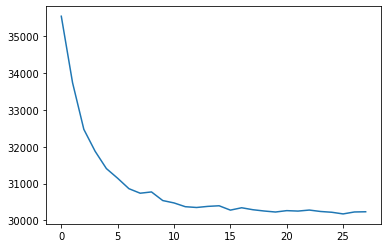

In [106]:
# Número óptimo de vecinos es aproximadamente 11
plt.plot(-np.array(res));

Otra forma de calcular los mejores parámetros es mediante la función `GridSearchCV` de `sklearn`. Esta función ejecuta un modelo bajo un rango de parámetros definidos por el usuario, y para cada uno de ellos analiza una serie de métricas, devolviendo como resultado los mejores parámetros para el modelo.

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

reg_kn = GridSearchCV(
    KNeighborsRegressor(),
    param_grid={"n_neighbors": np.arange(2,50)}
)

# Fit will test all of the combinations
reg_kn.fit(X, y);

In [108]:
reg_kn.best_estimator_

KNeighborsRegressor(n_neighbors=25)

In [109]:
reg_kn.best_params_

{'n_neighbors': 25}

## 2.3. Árboles de decisión

Los métodos de machine learning basados en árboles comprenden un conjunto de técnicas de aprendizaje supervisado, que permiten segmentar el espacio de los predictores en regiones simples, dentro de las cuales es más sencillo manejar las interacciones y predecir la variable respuesta. Dado que el conjunto de reglas de división utilizadas para segmentar el espacio predictor se puede resumir en un árbol, este tipo de efoques se conocen como métodos de árboles de decisión.

Aunque los métodos basados en árboles de decisión simples tienen ventajas como la simplicidad y la interpretabilidad, no son competitivos en cuanto a precisión si los comparamos con otros enfoques. Es por esto que en este notebook también veremos otros algoritmos basados en árboles como `bagging`, `random forests` o `boosting`. Estos métodos mejoran el desempeño de los árboles simples combinando varios de ellos, a costa de perder interpretabilidad.

Aunque el porcentaje mayoritario de aplicación es el campo de la clasificación, también se pueden emplear en regresiones de variables continuas.

Parámetros:

- *max_depth*: máxima profundidad, crea $2^n$ divisiones
- *min_sample_leaf*: mínimo número de muestras por hoja
- *min_samples_split*: mínimo número de muestras por hoja para subdividirse

In [124]:
# Separar el modelo en conjunto de test y entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [128]:
# 1 - Cargar las librerías scikit-learn
from sklearn.tree import DecisionTreeRegressor

# 2 - Crear una instancia
reg_dt = DecisionTreeRegressor(max_depth=3)

# 3 - Entrenar el modelo
reg_dt.fit(X_train, y_train)

# 4 - Predicción
y_pred = reg_kn.predict(X_test)

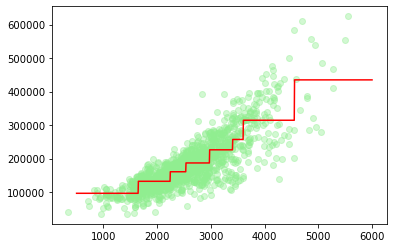

In [129]:
x_hip = np.linspace(500, 6000, 1000)
y_hip = reg_dt.predict(pd.DataFrame(x_hip))

plt.scatter(X, y, c='lightgreen', alpha=0.4)
plt.plot(x_hip, y_hip, c='red');

En la imagen anterior se puede apreciar que para una profundidad máxima de 3, se producen $2^3=8$ divisiones diferentes.

In [127]:
# Load the scorers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Use against predictions
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs(y_test-y_pred)/y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

scores = {'mae': mae, 'mape': mape, 'mse': mse, 'rmse': rmse, 'r2': r2}

for key in scores:
    print(f"{key} score is {scores[key]}")

mae score is 31037.307945205474
mape score is 0.16022258471320525
mse score is 2116770659.6697643
rmse score is 46008.37597296567
r2 score is 0.7355496096316454


In [130]:
# Buscar mejor max_depth y min_sample_leaf

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

reg_dt = GridSearchCV(
    DecisionTreeRegressor(),
    param_grid={"max_depth": np.arange(3, 10), 
                "min_samples_leaf": np.arange(20, 100, 1000)}
)

# Fit will test all of the combinations
reg_dt.fit(X, y)

reg_dt.best_estimator_

DecisionTreeRegressor(max_depth=4, min_samples_leaf=20)

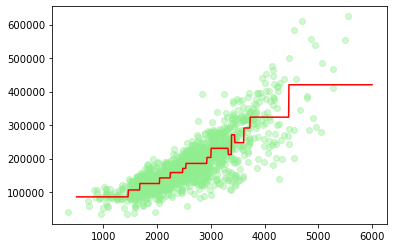

In [131]:
x_hip = np.linspace(500, 6000, 1000)
y_hip = reg_dt.predict(pd.DataFrame(x_hip))

plt.scatter(X, y, c='lightgreen', alpha=0.4)
plt.plot(x_hip, y_hip, c='red');

# 3. Algoritmos de clasificación

# X. Bibliografía

- KSchool Data Science Master Ed. 23.
- https://scikit-learn.org/stable/index.html
- https://empresas.blogthinkbig.com/que-algoritmo-elegir-en-ml-aprendizaje/